# Question 04
Import required packages

In [19]:
import pandas as pd
import numpy as np
import operator as op
import datetime
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Set options for pandas' display options

In [3]:
pd.set_option('display.width',5)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 1000)

# Part I
Import CSV file

In [5]:
temp = pd.read_csv('TEMP.csv')
print(temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574223 entries, 0 to 574222
Data columns (total 4 columns):
Date                               574223 non-null object
Monthly AverageTemp                541645 non-null float64
Monthly AverageTemp Uncertainty    542384 non-null float64
Country                            574223 non-null object
dtypes: float64(2), object(2)
memory usage: 17.5+ MB
None


Convert date to datetime 

In [6]:
temp['Date'] = pd.to_datetime(temp['Date'])
print(temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574223 entries, 0 to 574222
Data columns (total 4 columns):
Date                               574223 non-null datetime64[ns]
Monthly AverageTemp                541645 non-null float64
Monthly AverageTemp Uncertainty    542384 non-null float64
Country                            574223 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.5+ MB
None


Filter out dates later than 1900. Dataframe results 574223 to 328503 results.

In [7]:
date_object = datetime.datetime(1900,1,1)
temp1900 = temp.loc[(temp.Date >= date_object)]
print(temp1900.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328503 entries, 741 to 574222
Data columns (total 4 columns):
Date                               328503 non-null datetime64[ns]
Monthly AverageTemp                327454 non-null float64
Monthly AverageTemp Uncertainty    328193 non-null float64
Country                            328503 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 12.5+ MB
None


Group by country and get difference of max and min monthly averages

In [22]:
tempgrouped = temp1900.groupby('Country')
monthly_average = tempgrouped["Monthly AverageTemp"].agg({'Max':np.max,'Min':np.min})
monthly_average['Difference'] = monthly_average['Max'] - monthly_average['Min']
monthly_average = monthly_average.sort_values('Difference',ascending=False)
monthly_average = monthly_average.head(20)
monthly_average

,Max,Min,Difference
Country,,,
Kazakhstan,25.562,-23.601,49.163
Mongolia,20.716,-27.294,48.010
Russia,16.893,-29.789,46.682
Canada,14.796,-28.736,43.532
Uzbekistan,30.375,-12.323,42.698
...,...,...,...
Denmark,0.699,-36.439,37.138
Lithuania,21.791,-15.179,36.970
Tajikistan,19.363,-16.466,35.829


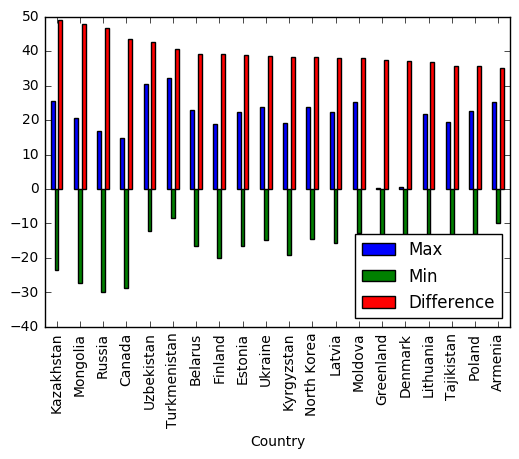

In [8]:
plt.figure()
plot = monthly_average.plot(kind='bar')
plt.show()

# Part II

Part A

In [21]:
UStemp = temp.loc[(temp.Country == "United States")]
UStemp.loc['Date'] = pd.to_datetime(UStemp['Date'])
date_object = datetime.datetime(1900,1,1)
UStemp = UStemp.loc[(UStemp.Date >= date_object)]
UStemp['Monthly AverageTemp F'] = ( UStemp['Monthly AverageTemp'] * 1.8) + 32
UStemp

,Date,Monthly AverageTemp,Monthly AverageTemp Uncertainty,Country,Monthly AverageTemp F
553217,1900-01-01,-2.573,0.443,United States,27.3686
553218,1900-02-01,-2.912,0.533,United States,26.7584
553219,1900-03-01,2.636,0.358,United States,36.7448
553220,1900-04-01,8.091,0.263,United States,46.5638
553221,1900-05-01,14.317,0.239,United States,57.7706
...,...,...,...,...,...
554577,2013-05-01,14.073,0.178,United States,57.3314
554578,2013-06-01,20.198,0.236,United States,68.3564
554579,2013-07-01,22.074,0.152,United States,71.7332
554580,2013-08-01,21.168,0.249,United States,70.1024


### Part B

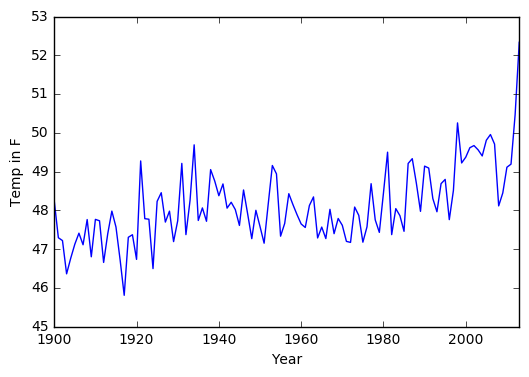

In [24]:
UStemp["Year"] = UStemp['Date'].dt.year
UStempgrouped = UStemp.groupby("Year")
UStemp_yearly_avg = UStempgrouped.agg(np.average)
UStemp_yearly_avg = UStemp_yearly_avg.drop('Monthly AverageTemp Uncertainty',1)
UStemp_yearly_avg = UStemp_yearly_avg.drop('Monthly AverageTemp',1)
plt.figure()
plot = UStemp_yearly_avg.plot(legend=False)
plt.ylabel('Temp in F')
plt.show()

### Part C

In [25]:
twoyearave = []
for index, row in UStemp_yearly_avg.iterrows():
    if index+1 not in UStemp_yearly_avg.index:
        break
    yearplus = index + 1
    years = "%s-%s" % (index,yearplus)
    thisyear = row["Monthly AverageTemp F"]
    nextyear = UStemp_yearly_avg.loc[yearplus]["Monthly AverageTemp F"]
    diff = thisyear - nextyear
    twoyearave.append((years,format(diff,'.4f')))

In [26]:
for i in twoyearave[:5]:
    print(i)

('1900-1901', '0.9480')
('1901-1902', '0.0737')
('1902-1903', '0.8582')
('1903-1904', '-0.4022')
('1904-1905', '-0.3630')


# Part III

In [27]:
city = pd.read_csv('CityTemp.csv')
city['Date'] = pd.to_datetime(city['Date'])
city = city.loc[(city.Date >= datetime.datetime(1900,1,1))]
city_grouped = city.groupby('City')
city_grouped_difference = city_grouped["Monthly AverageTemp"].agg({'Max':np.max,'Min':np.min})
city_grouped_difference['Difference'] = city_grouped_difference['Max'] - city_grouped_difference['Min']
city_grouped_difference = city_grouped_difference.sort_values('Difference',ascending=False)
city_grouped_difference = city_grouped_difference.head(20)
city_grouped_difference

,Max,Min,Difference
City,,,
Harbin,26.509,-26.772,53.281
Changchun,26.572,-23.272,49.844
Moscow,24.580,-19.376,43.956
Shenyang,26.010,-17.035,43.045
Montreal,23.059,-18.363,41.422
...,...,...,...
Tangshan,27.346,-7.487,34.833
New York,25.313,-9.147,34.460
Baghdad,38.283,4.236,34.047


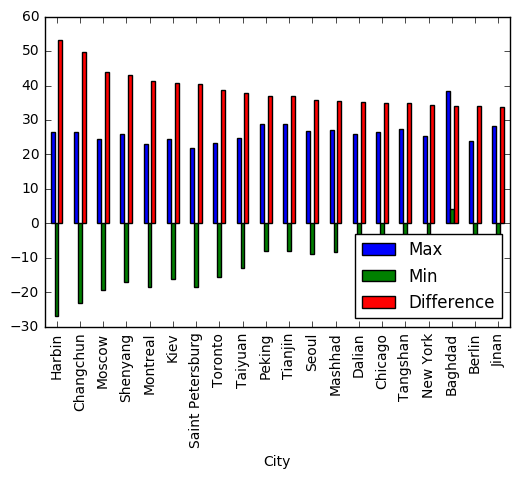

In [28]:
plt.figure()
plot = city_grouped_difference.plot(kind='bar')
plt.show()

# Part 4
The graphs have a similar shape. The difference in temperates from the City data set are generally lower than the "Temp" dataset, which records monthly temperates by country. It's interesting that three of the four cities with the most extreme temperature are in China, yet as a country, it does not appear in the top 20 amoung other countries.  